In [1]:
import tensorflow as tf
import numpy as np

In [3]:
t = tf.constant([1,2,3], dtype='float32')
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [5]:
a=t.numpy()
a

array([1., 2., 3.], dtype=float32)

In [6]:
t2= tf.constant(a)
t2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [7]:
t3 = tf.convert_to_tensor(a)
t3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [8]:
raw_data1=np.arange(10)
raw_data1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [11]:
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [13]:
raw_data2 = np.arange(10,20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [14]:
print(raw_data1)
print(raw_data2)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


In [17]:
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
for raw1, raw2 in dataset2:
    print(raw1, raw2, sep='---')

tf.Tensor(0, shape=(), dtype=int32)---tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)---tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)---tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)---tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)---tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)---tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)---tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)---tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)---tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)---tf.Tensor(19, shape=(), dtype=int32)


In [19]:
dataset3 = dataset.take(3)
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [23]:
d = dataset2.take(2)
for x,y in d:
    print(x,y)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)


In [25]:
#shuffle
dataset4 = dataset.shuffle(10)
print(type(dataset4))

for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [28]:
#drop_remainder
dataset5 = dataset.batch(3, drop_remainder=True)
print(type(dataset5))
for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)


In [30]:
dataset6 = dataset.shuffle(10).batch(3)
for data in dataset6:
    print(data)

tf.Tensor([2 5 3], shape=(3,), dtype=int32)
tf.Tensor([1 8 0], shape=(3,), dtype=int32)
tf.Tensor([4 6 9], shape=(3,), dtype=int32)
tf.Tensor([7], shape=(1,), dtype=int32)


In [31]:
dataset7 = dataset.repeat(2)
for d in dataset7:
    print(d)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [32]:
dataset8 = dataset.shuffle(10).batch(5).repeat(2)
for d in dataset8:
    print(d)

tf.Tensor([0 5 1 9 7], shape=(5,), dtype=int32)
tf.Tensor([2 3 4 6 8], shape=(5,), dtype=int32)
tf.Tensor([1 4 9 5 8], shape=(5,), dtype=int32)
tf.Tensor([2 6 0 3 7], shape=(5,), dtype=int32)


In [36]:
dataset14 = dataset.filter(lambda x: x>5)
for data in dataset14:
    print(data)
    

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [43]:
#종합
raw_data = np.arange(-10,11)

dataset_final = tf.data.Dataset.from_tensor_slices(raw_data)\
                                .filter(lambda x:x>=0)\
                                .map(lambda x: x+10)\
                                .shuffle(raw_data.size)\
                                .batch(3)

for d in dataset_final:
    print(d)

tf.Tensor([14 18 19], shape=(3,), dtype=int32)
tf.Tensor([10 17 13], shape=(3,), dtype=int32)
tf.Tensor([16 15 20], shape=(3,), dtype=int32)
tf.Tensor([12 11], shape=(2,), dtype=int32)


In [45]:
#회귀문제
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,models

In [46]:
np.random.seed(0)
tf.random.set_seed(0)

In [49]:
(train_x, train_y),(test_x, test_y)= keras.datasets.boston_housing.load_data()
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(404, 13) (404,)
(102, 13) (102,)


In [51]:
#하이퍼파라미터, 변수 정의
learning_rate=0.001
n_epochs=100
n_batch=50
n_train = train_x.shape[0]
n_test = test_x.shape[0]

In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled=ss.fit_transform(train_x)
x_test_scaled=ss.transform(test_x)

In [58]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_scaled, train_y))\
                               .shuffle(n_train)\
                               .batch(n_batch, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, test_y))\
                                                  .shuffle(n_test)\
                                                  .batch(n_test, drop_remainder=True)

In [60]:
x_train_scaled.shape

(404, 13)

In [64]:
def create_housing_model():
    model = keras.Sequential()
    #input_shape###
    model.add(layers.Dense(units=128, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=16, activation='relu'))
    
    model.add(layers.Dense(units=1))
    return model ###

In [65]:
model = create_housing_model()

model.compile(optimizer= keras.optimizers.Adam(learning_rate=learning_rate),
             loss='mse')

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


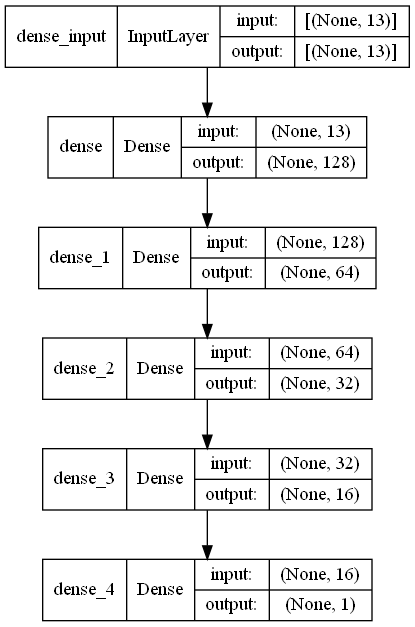

In [67]:
keras.utils.plot_model(model, show_shapes=True)

In [68]:
#학습
hist = model.fit(train_dataset,
                epochs=n_epochs,
                validation_data=test_dataset)

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 574.7323 - val_loss: 593.6151
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 549.7366 - val_loss: 554.3170
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 500.3100 - val_loss: 489.5057
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 420.7487 - val_loss: 380.9994
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 292.6837 - val_loss: 219.0949
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 141.5128 - val_loss: 84.1570
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 70.9080 - val_loss: 69.9755
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 57.5951 - val_loss: 44.3300
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 36.9392 - val_loss: 37.5418
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 30.9507 - val_loss: 30.74

8/8 [==============================] - 0s 2ms/step - loss: 5.8014 - val_loss: 17.6507
Epoch 84/100
8/8 [==============================] - 0s 2ms/step - loss: 5.8446 - val_loss: 18.0898
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 5.7284 - val_loss: 16.8600
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 5.5859 - val_loss: 17.5110
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 5.6011 - val_loss: 16.7307
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 5.8007 - val_loss: 16.2438
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 5.6975 - val_loss: 17.4954
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 5.2078 - val_loss: 16.3524
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 5.3113 - val_loss: 17.3208
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 5.2097 - val_loss: 16.2846
Epoch 93/100
8/8 [=====

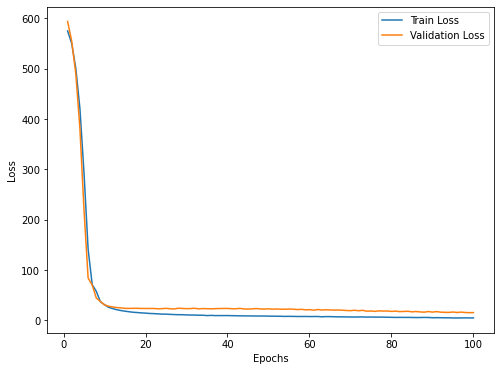

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1,n_epochs+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,n_epochs+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

#
#plt.ylim(0,50)

plt.legend()
plt.show()

In [74]:
#최종테스트
loss=model.evaluate(test_dataset)
loss

1/1 [==============================] - 0s 10ms/step - loss: 15.3784


15.378376960754395

In [75]:
#model.save('model/my_reslut0')

In [79]:
#데이터 추론
new_data = x_test_scaled[:5]
pred = model.predict(new_data)
pred

array([[ 8.168396],
       [18.796722],
       [21.631514],
       [30.355867],
       [24.970098]], dtype=float32)

In [81]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

In [82]:
#분류#######################################################

In [84]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [86]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [88]:
(train_img, train_label), (test_img, test_label) = keras.datasets.fashion_mnist.load_data()

train_img.shape, test_img.shape

((60000, 28, 28), (10000, 28, 28))

In [89]:
#train_x,y 만으로 함!!!!!!
from sklearn.model_selection import train_test_split

train_img, val_img, train_label, val_label = train_test_split(train_img, train_label, test_size=0.2, stratify=train_label, random_state=0)

In [90]:
train_img.shape, val_img.shape, test_img.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [123]:
#하이퍼파라미터, 변수 설정
Learning_rate = 0.001
n_epochs = 100
n_batchs= 100

n_train = train_img.shape[0]
n_val = val_img.shape[0]
n_test = test_img.shape[0]

In [92]:
train_label

array([6, 5, 0, ..., 7, 4, 9], dtype=uint8)

In [93]:
#
train_label.shape

(48000,)

In [95]:
#원핫인코딩 처리 #y값을 원핫인코딩
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


In [101]:
X_train = train_img.astype(np.float32)
X_val = val_img.astype(np.float32)
X_test = test_img.astype(np.float32)

In [105]:
#dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/225, y))\
                               .shuffle(n_train)\
                               .batch(n_batchs, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))\
                             .map(lambda x,y: (x/255,y))\
                             .shuffle(n_val)\
                             .batch(n_batchs, drop_remainder=True)

test_datdaset = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
                               .map(lambda x,y : (x/255, y))\
                               .shuffle(n_test)\
                               .batch(n_batchs, drop_remainder=True)

In [117]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))    
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
#    model.add(layers.Dense(10, activiation='softmax'))
    model.add(layers.Dense(10, activation='softmax'))    
    return model

In [126]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(Learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 256)               200960    
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


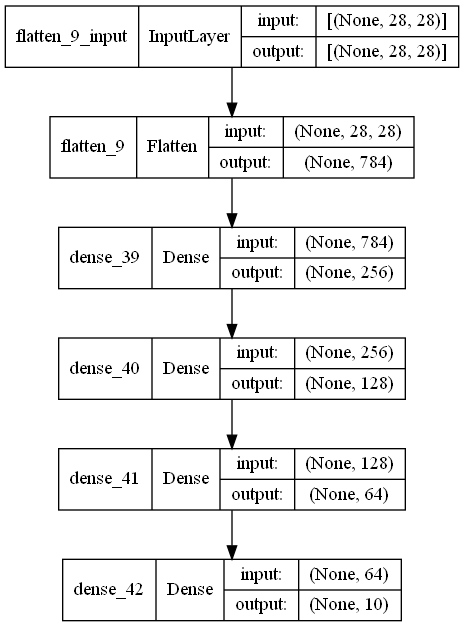

In [129]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_result.png')

In [130]:
#train
hist = model.fit(train_dataset,
                epochs=n_epochs,
                 validation_data=val_dataset
                )

Epoch 1/100
480/480 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.8097 - val_loss: 0.4250 - val_accuracy: 0.8433
Epoch 2/100
480/480 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8629 - val_loss: 0.3761 - val_accuracy: 0.8567
Epoch 3/100
480/480 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8744 - val_loss: 0.3441 - val_accuracy: 0.8735
Epoch 4/100
480/480 [==============================] - 1s 2ms/step - loss: 0.3128 - accuracy: 0.8848 - val_loss: 0.3371 - val_accuracy: 0.8747
Epoch 5/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.8915 - val_loss: 0.3211 - val_accuracy: 0.8832
Epoch 6/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2785 - accuracy: 0.8964 - val_loss: 0.3323 - val_accuracy: 0.8795
Epoch 7/100
480/480 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.9006 - val_loss: 0.3087 - val_accuracy: 0.8852

Epoch 58/100
480/480 [==============================] - 2s 3ms/step - loss: 0.0712 - accuracy: 0.9744 - val_loss: 0.5502 - val_accuracy: 0.8892
Epoch 59/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9783 - val_loss: 0.5187 - val_accuracy: 0.8999
Epoch 60/100
480/480 [==============================] - 2s 2ms/step - loss: 0.0586 - accuracy: 0.9777 - val_loss: 0.5553 - val_accuracy: 0.8905
Epoch 61/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9770 - val_loss: 0.5769 - val_accuracy: 0.8974
Epoch 62/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9778 - val_loss: 0.5783 - val_accuracy: 0.8955
Epoch 63/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0547 - accuracy: 0.9791 - val_loss: 0.5575 - val_accuracy: 0.8996
Epoch 64/100
480/480 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9764 - val_loss: 0.5484 - val_accuracy:

In [131]:
#12가 제일 낮음
model = create_model()

model.compile(optimizer=keras.optimizers.Adam(Learning_rate),
             loss='categorical_crossentropy',
              metrics = ['accuracy']
             )

In [133]:
hist = model.fit(train_dataset,
                epochs=12,
                validation_data=val_dataset)

Epoch 1/12
480/480 [==============================] - 2s 2ms/step - loss: 0.5406 - accuracy: 0.8097 - val_loss: 0.4169 - val_accuracy: 0.8528
Epoch 2/12
480/480 [==============================] - 2s 2ms/step - loss: 0.3845 - accuracy: 0.8624 - val_loss: 0.3964 - val_accuracy: 0.8519
Epoch 3/12
480/480 [==============================] - 2s 3ms/step - loss: 0.3432 - accuracy: 0.8749 - val_loss: 0.3551 - val_accuracy: 0.8679
Epoch 4/12
480/480 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8827 - val_loss: 0.3255 - val_accuracy: 0.8808
Epoch 5/12
480/480 [==============================] - 2s 3ms/step - loss: 0.2968 - accuracy: 0.8908 - val_loss: 0.3326 - val_accuracy: 0.8784
Epoch 6/12
480/480 [==============================] - 1s 2ms/step - loss: 0.2794 - accuracy: 0.8956 - val_loss: 0.3117 - val_accuracy: 0.8829
Epoch 7/12
480/480 [==============================] - 2s 3ms/step - loss: 0.2660 - accuracy: 0.9014 - val_loss: 0.3107 - val_accuracy: 0.8876
Epoch 

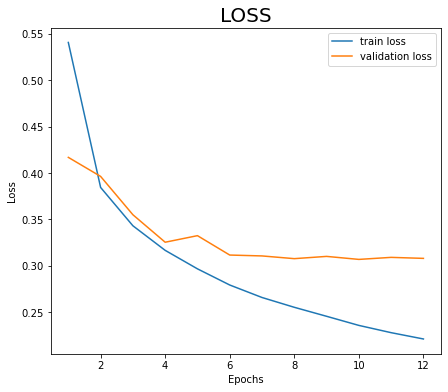

In [134]:
plt.figure(figsize=(7,6))
plt.plot(range(1, 12+1), hist.history['loss'], label='train loss')
plt.plot(range(1, 12+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

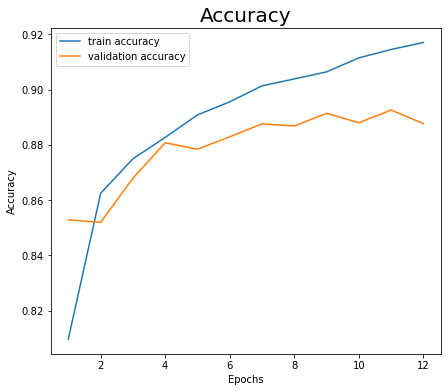

In [135]:
plt.figure(figsize=(7,6))
plt.plot(range(1, 12+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, 12+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [138]:
loss, accuracy = model.evaluate(test_datdaset)

100/100 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8831


In [140]:
loss, accuracy

(0.331143319606781, 0.8830999732017517)

In [141]:
#새로운 데이터 추론
new_input = X_test[:5]

new_input = new_input/255.0

In [142]:
pred = model.predict(new_input)
pred.shape

(5, 10)

In [143]:
pred

array([[2.38794996e-06, 3.14521931e-05, 2.00002273e-06, 2.57307374e-06,
        9.61721798e-06, 6.95888139e-03, 5.05169965e-06, 3.78316781e-03,
        3.88294893e-07, 9.89204586e-01],
       [5.36578264e-05, 4.71882267e-09, 9.86414254e-01, 2.97512975e-06,
        1.16158407e-02, 1.06865707e-08, 1.91275089e-03, 8.45061354e-09,
        1.47948214e-07, 3.32363243e-07],
       [7.05196526e-11, 1.00000000e+00, 8.45510565e-13, 1.08511516e-11,
        4.82704751e-13, 4.43907458e-19, 9.64119784e-10, 5.49318496e-19,
        2.01941816e-13, 5.52214229e-17],
       [8.83371501e-11, 1.00000000e+00, 2.29944640e-11, 1.55961591e-10,
        9.76695461e-12, 1.75645358e-16, 3.11015724e-09, 1.89064940e-16,
        2.03911215e-12, 7.97145248e-15],
       [2.31578544e-01, 4.70117720e-06, 1.17695555e-02, 9.52223141e-04,
        3.08990106e-03, 1.49570383e-06, 7.52528489e-01, 2.52186851e-07,
        7.12097099e-05, 3.62212609e-06]], dtype=float32)

In [147]:
pred_class = np.argmax(pred, axis=-1) #1
pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [148]:
test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [150]:
class_names= np.array(class_names)
class_names[pred_class]

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt'],
      dtype='<U11')